<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter3/CMCtestloss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!python --version

Python 3.7.11


# Example 3.5
## Import modules

In [6]:
import numpy as np, matplotlib.pyplot as plt 
from numpy.random import rand, randn
from numpy.linalg import solve
print(np.__version__)

1.19.5


## Set random seed

In [7]:
np.random.seed(9)

## Original Program

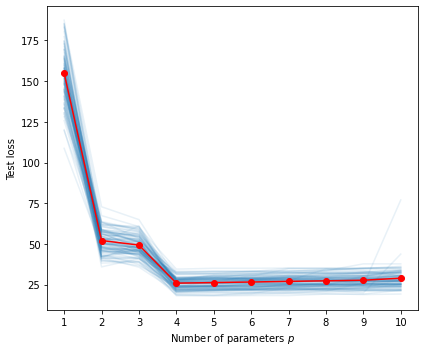

In [11]:
def generate_data(beta, sig, n):
    u = rand(n, 1)
    y = (u ** np.arange(0, 4)) @ beta + sig * randn(n, 1)
    return u, y

beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
betahat = {}
plt.figure(figsize=[6,5])
max_p = 10
totMSE = np.zeros(max_p)

p_range = np.arange(1, max_p + 1, 1)

for N in range(0,100):
    u, y = generate_data(beta, sig, n)  #training data
    X = np.ones((n, 1))
    for p in p_range:
       if p > 1:
         X = np.hstack((X, u**(p-1)))
       betahat[p] = solve(X.T @ X, X.T @ y)
    
    u_test, y_test = generate_data(beta, sig, n)  #test data
    MSE = []
    X_test = np.ones((n, 1))
    for p in p_range:
       if p > 1:
           X_test = np.hstack((X_test, u_test**(p-1)))
       y_hat = X_test @ betahat[p] # predictions
       MSE.append(np.sum((y_test - y_hat)**2/n))
     
    totMSE = totMSE + np.array(MSE)
    plt.plot(p_range, MSE,'C0',alpha=0.1)

plt.plot(p_range,totMSE/N,'r-o')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('MSErepeatpy.pdf',format='pdf')
plt.show()